**지도 학습**
*   분류와 회귀



지도 학습 알고리즘 

In [ ]:
pip install mglearn

**한글 깨짐 방지**

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


**예제에 사용할 데이터 셋**

1. 이진 부류 데이터셋(forge) 확인하기

데이터셋 다운로드 

In [ ]:
import mglearn
import matplotlib.pyplot as plt

#데이터셋 만들기

X,y = mglearn.datasets.make_forge()#이차원으로 되어있기때문이 대문자X



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


**데이터 확인하기**


In [ ]:
print('X.shape : ', X.shape)
print('y.shape : ', y.shape)



X.shape :  (26, 2)
y.shape :  (26,)


In [ ]:
X # 이차원으로 데이터들이 들어가있는것을 확인 할수있음

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [ ]:
y # 0과 1로 되어있다 이중분류 가능하다

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


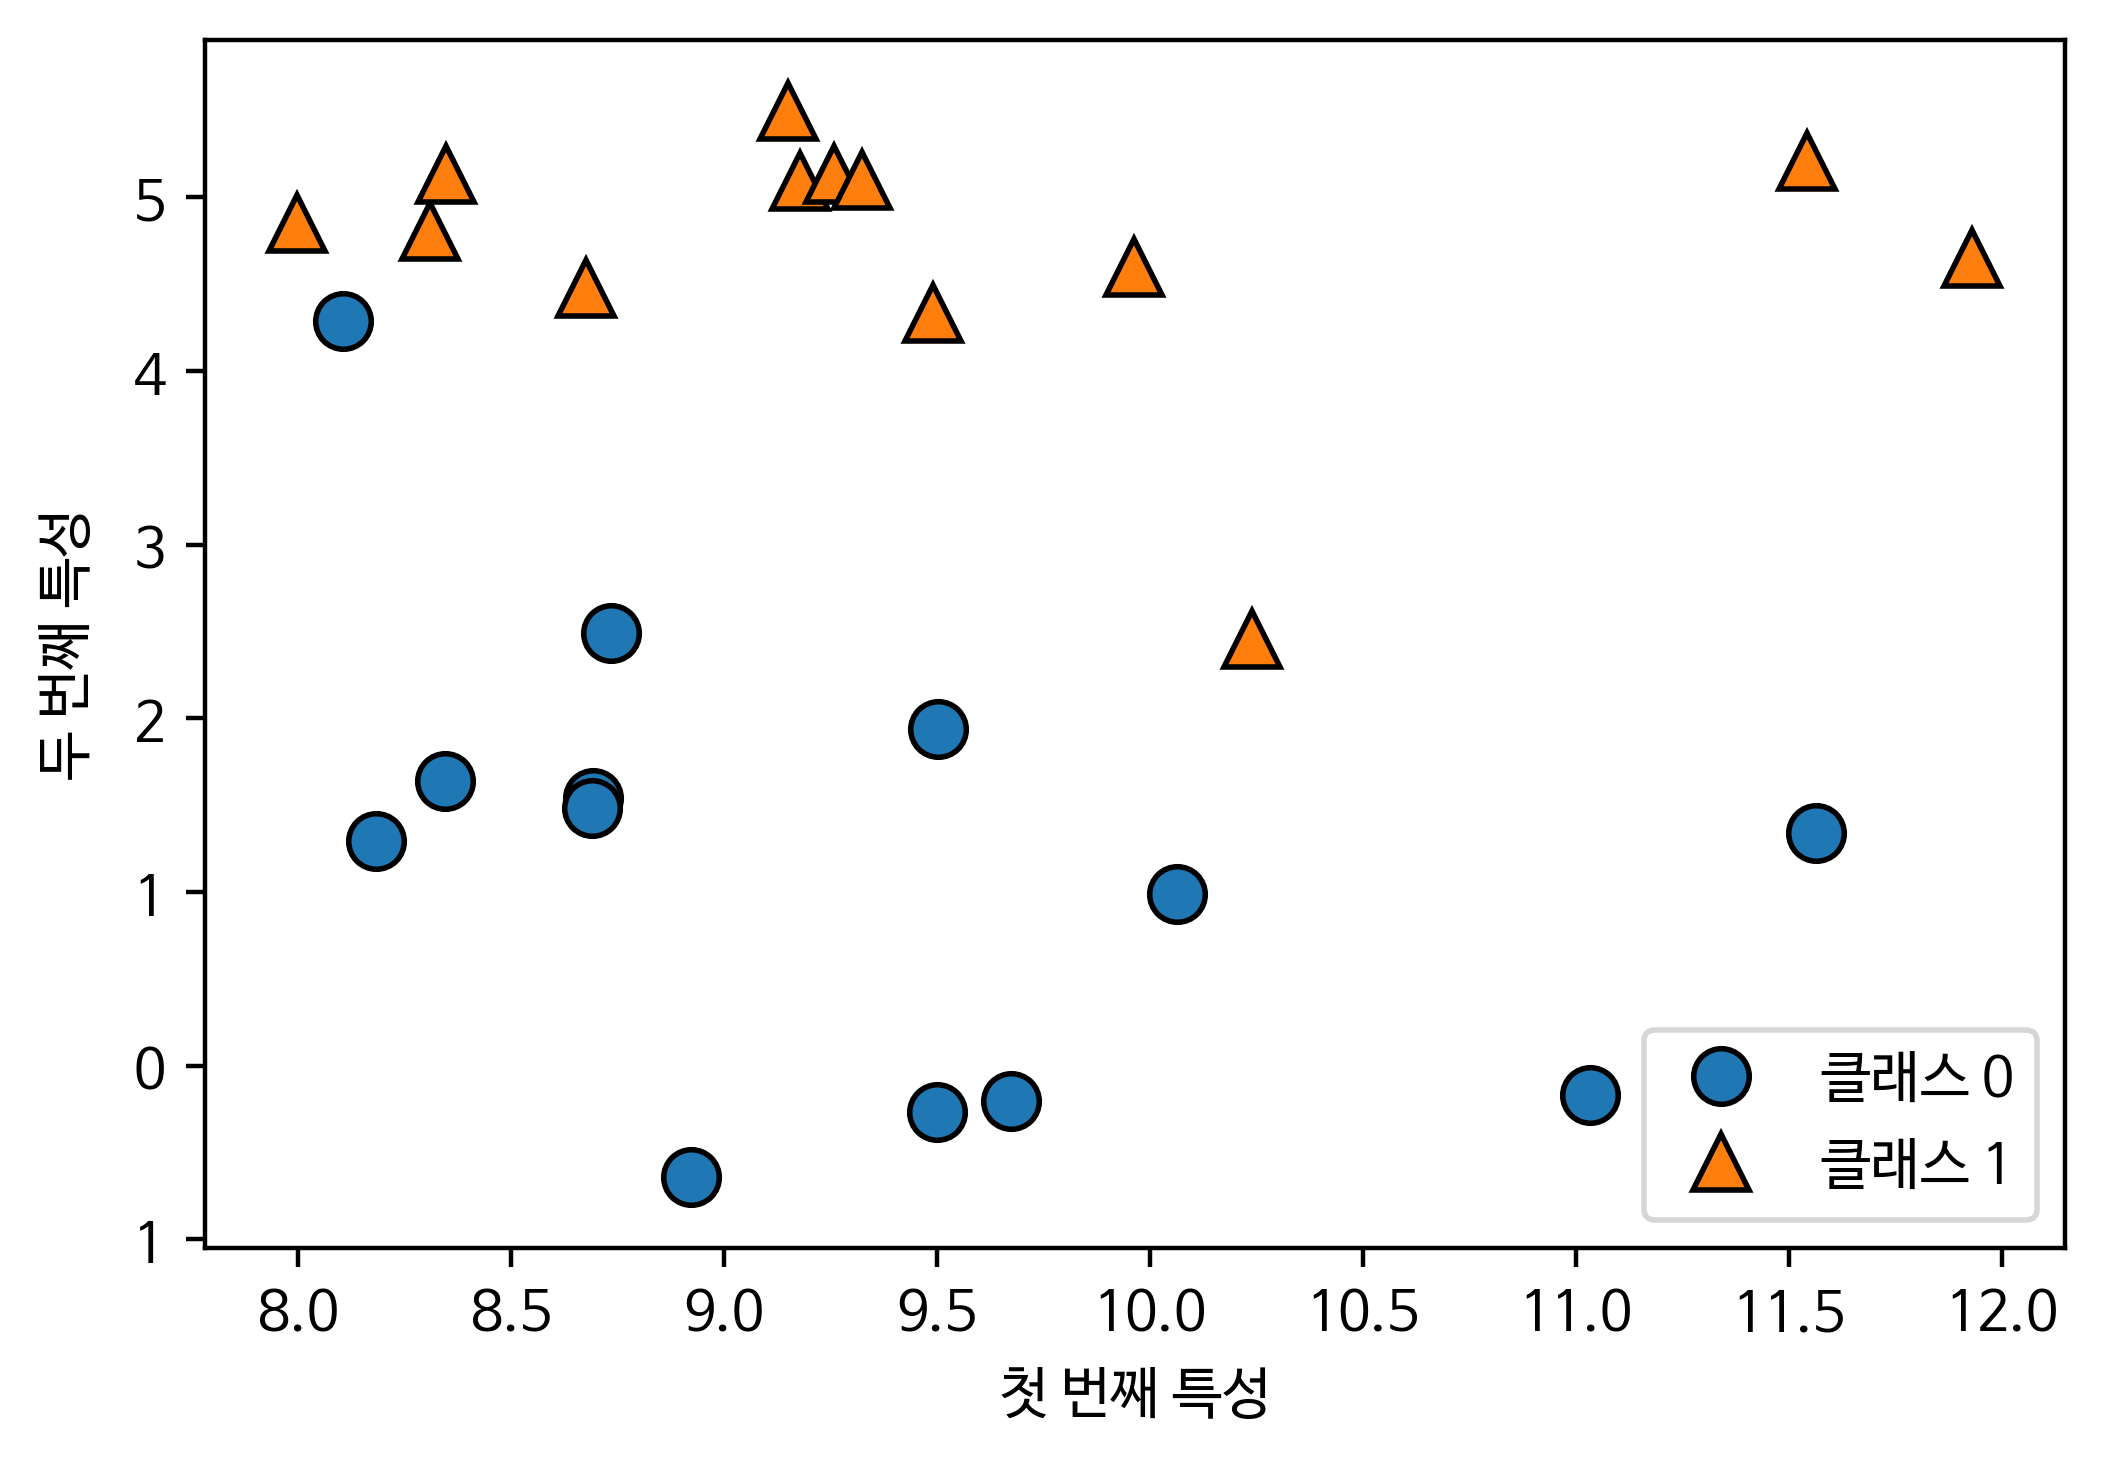

In [ ]:
plt.figure(dpi=200)
plt.rc('font', family ='NanumBarunGothic')

#산점도 그리기

mglearn.discrete_scatter(X[:, 0], X[:, 1], y) #  2개 피처  첫번째 x  두번째 y  

plt.legend(['클래스 0', '클래스 1'], loc = 4)
plt.xlabel('첫 번째 특성')
plt.ylabel('두 번째 특성')
plt.show()


2. 회귀 데이터셋(wave) 확인하기

데이터 다운로드

In [ ]:
X,y = mglearn.datasets.make_wave(n_samples=40)

데이터 확인하기

In [ ]:
print("X.shape:",X.shape)
print("y.shape:",y.shape)

X.shape: (40, 1)
y.shape: (40,)


In [ ]:
y

array([-0.44822073,  0.33122576,  0.77932073,  0.03497884, -1.38773632,
       -2.47196233, -1.52730805,  1.49417157,  1.00032374,  0.22956153,
       -1.05979555,  0.7789638 ,  0.75418806, -1.51369739, -1.67303415,
       -0.90496988,  0.08448544, -0.52734666, -0.54114599, -0.3409073 ,
        0.21778193, -1.12469096,  0.37299129,  0.09756349, -0.98618122,
        0.96695428, -1.13455014,  0.69798591,  0.43655826, -0.95652133,
        0.03527881, -2.08581717, -0.47411033,  1.53708251,  0.86893293,
        1.87664889,  0.0945257 , -1.41502356,  0.25438895,  0.09398858])

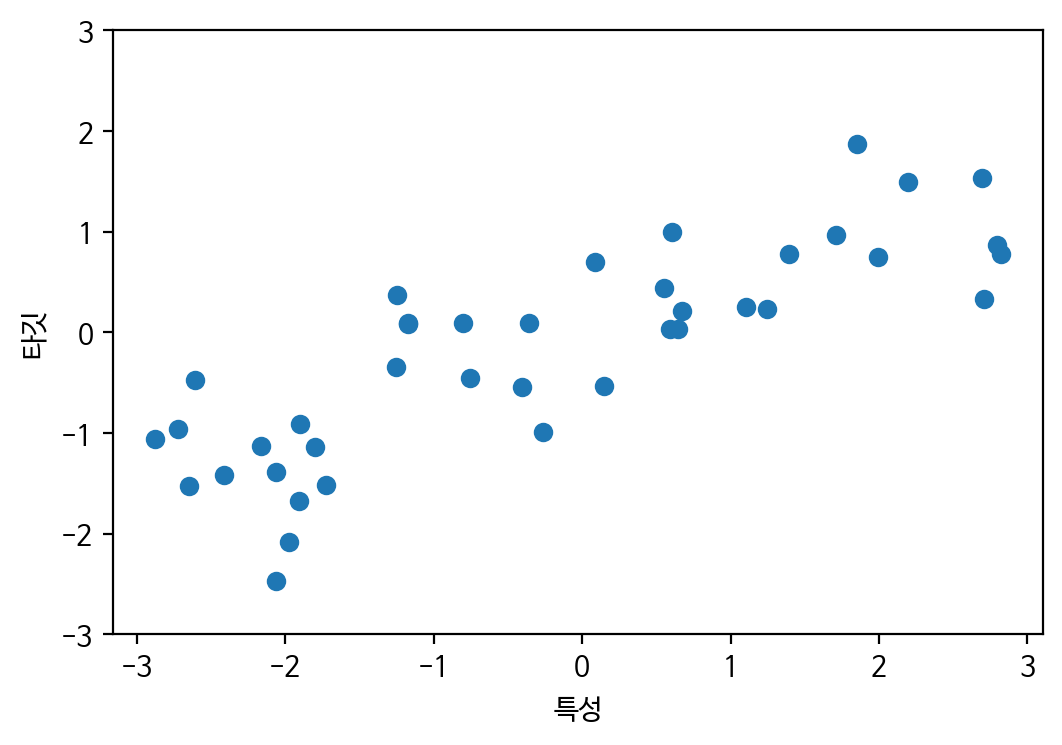

In [ ]:
#산점도 그리기

plt.figure(dpi=100)
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.plot(X,y, 'o')
plt.ylim(-3,3)
plt.xlabel('특성')
plt.ylabel('타깃')
plt.show()

분류 문제정의 : 위스콘신 유방암 데이터 셋을 사용한 악성 종양(Label,1)예측하기

데이터 준비하기(https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))


In [ ]:
from sklearn.datasets import  load_breast_cancer

cancer = load_breast_cancer()
print(cancer.keys()) # 데이터셋 키 확인 # 악성종양은 1 양성 종양은 0

cancer

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

데이터 확인하기

In [ ]:
cancer.data.shape # 유방암 데이터의 형태 -> 569건, 특성 30개

(569, 30)

In [ ]:
#클래스별 샘플 개수 

import numpy as np



#양성, 악성 종양의 비율 37% : 63%
{n : v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}



{'benign': 357, 'malignant': 212}

In [ ]:
#데이터의 특성 (feature) 확인
cancer.feature_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

회귀 문제 정의 : 보스톤 주택 가격 데이터 셋을 사용한 보스턴 주변의 주택 평균 가격 예측하기


https://www.kaggle.com/c/boston-housing


In [ ]:
from sklearn.datasets import  load_boston

boston = load_boston()

데이터 확인하기

In [ ]:
#데이터 형태 확인

boston.data.shape # 506개 데이터, 13개 특성

(506, 13)

In [ ]:
#e데이터의 특성(feature) 확인
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

**선형 분류 모델의 c설정에 따른 결정 경계**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


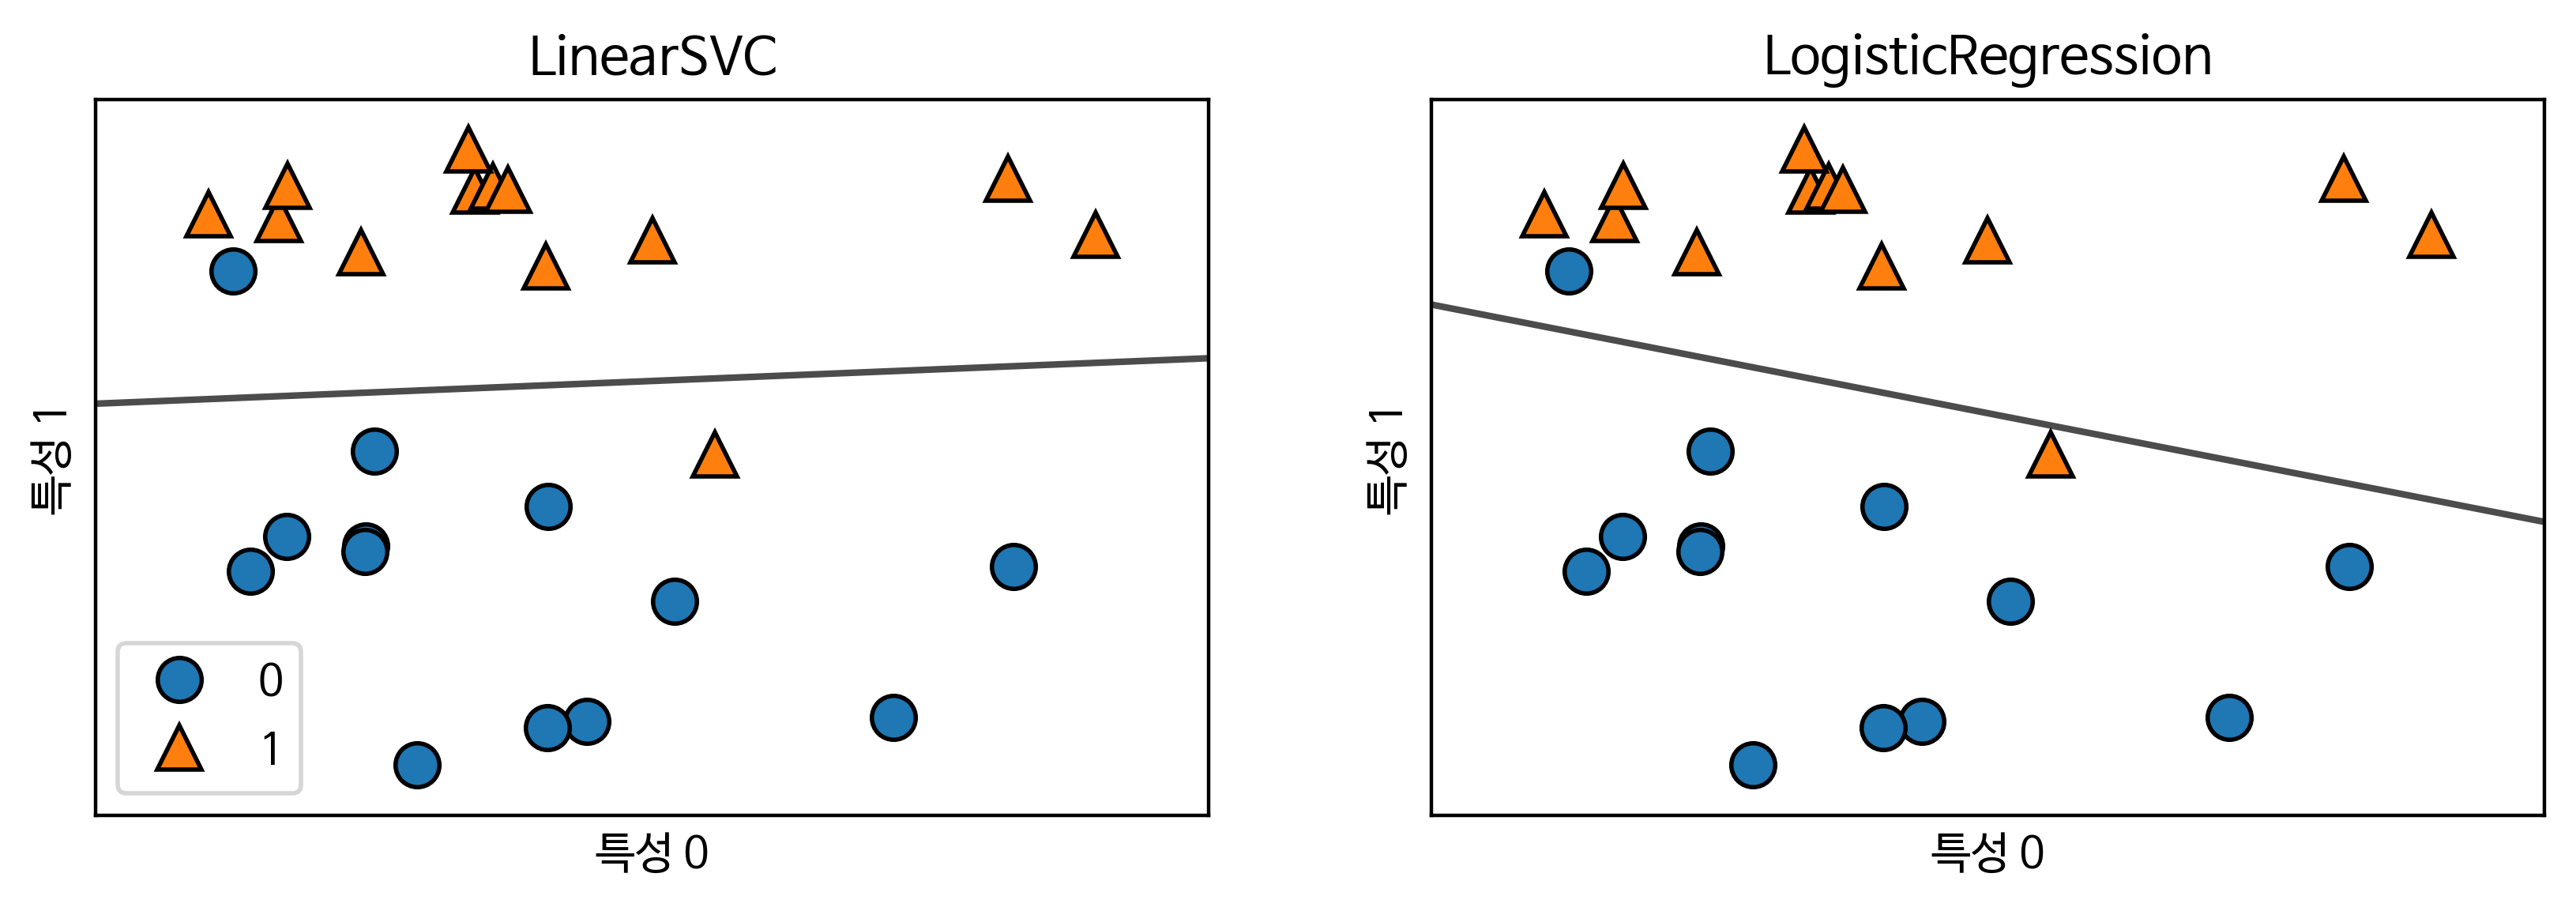

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi']  = 200

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
plt.show()


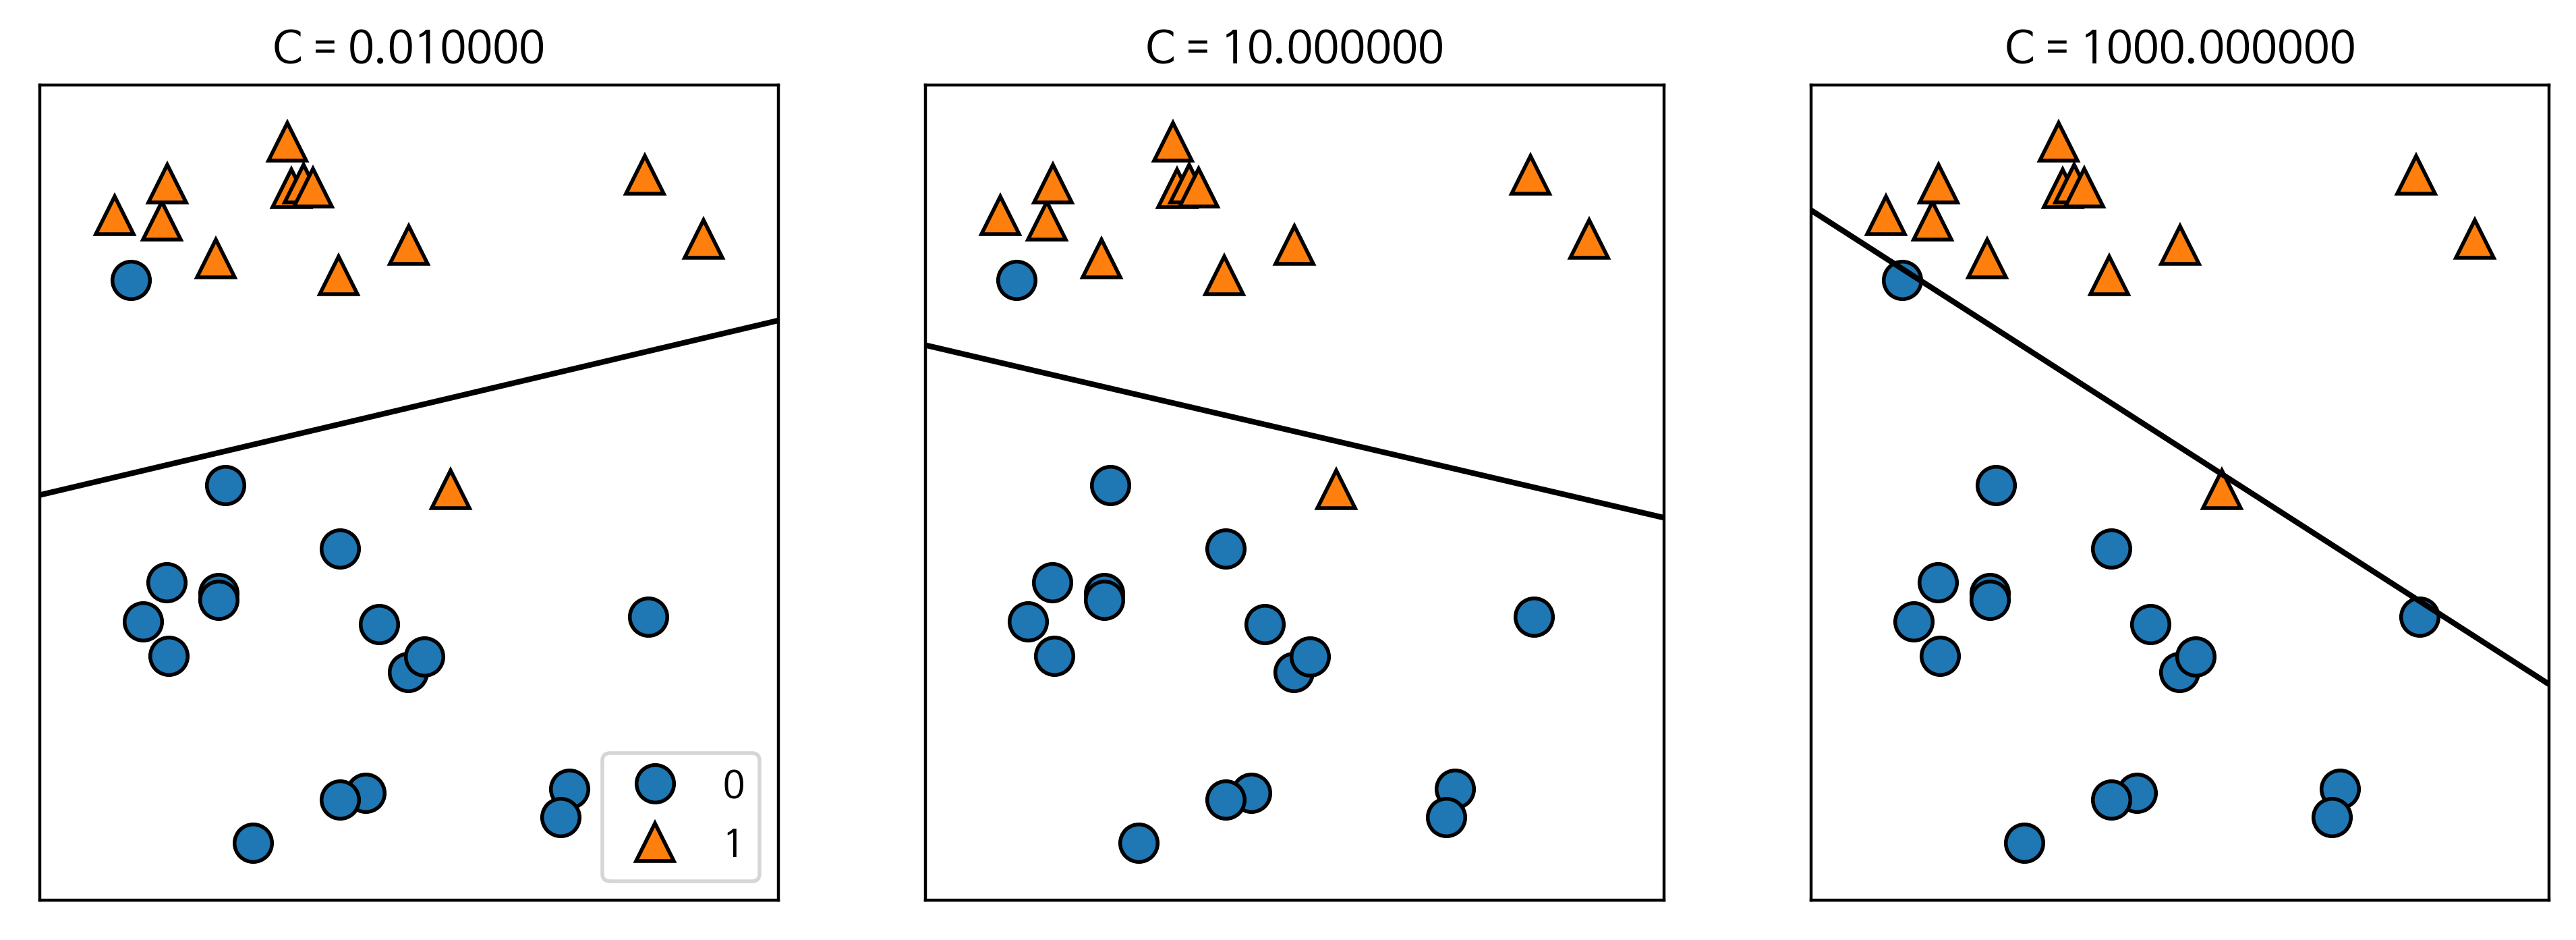

In [ ]:
# c의 값이 낮을 수록 -> 규제 높음 (과소 적합)
#c의 값이 높을 수록 -> 규제 낮음(과대 적합)

mglearn.plots.plot_linear_svc_regularization() # c의 값이 낮을 수록 -> 규제 높음(과소적합),c의 값이 높을 수록 -> 규제 낮음(과대 적합)

**유방암 데이터셋을 사용한 로지스틱 회귀 성능평가**

**규제의 강도를 결정하는 매개변수 c값 설정에 따른 유방암 데이터셋을 사용한 성능 평가 비교**

**데이터 준비하기**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split



In [ ]:
cancer = load_breast_cancer() # 데이터 다운로드

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=42)



LogisticRegreesion c=1 (디폴트)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter= 5000).fit(X_train,y_train) #규제 c=1

print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train,y_train)))
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_test,y_test)))

훈련 세트 점수 : 0.958
훈련 세트 점수 : 0.958


LogisticRegreesion c=100 (규제완화)L2규제

In [ ]:
logreg100 = LogisticRegression(C=100,max_iter=5000).fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train,y_train)))
print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_test,y_test)))

훈련 세트 점수 : 0.984
훈련 세트 점수 : 0.972


LogisticRegreesion c=100(규제완화) L1원으로 규제

In [ ]:
 lr_l1 = LogisticRegression(solver='liblinear', C=100, penalty="l1", max_iter=1000).fit(X_train, y_train)

   
print("훈련 세트 점수 : {:.3f}".format(lr_l1.score(X_train,y_train)))
print("훈련 세트 점수 : {:.3f}".format(lr_l1.score(X_test,y_test)))

훈련 세트 점수 : 0.986
훈련 세트 점수 : 0.979


LogisticRegreesion c=0.01 (규제강화)

In [ ]:
logreg001 = LogisticRegression(C=0.01,max_iter=5000).fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train,y_train)))
print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_test,y_test)))

훈련 세트 점수 : 0.953
훈련 세트 점수 : 0.951


In [ ]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()


**L1 규제를 통한 특성 확인**

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


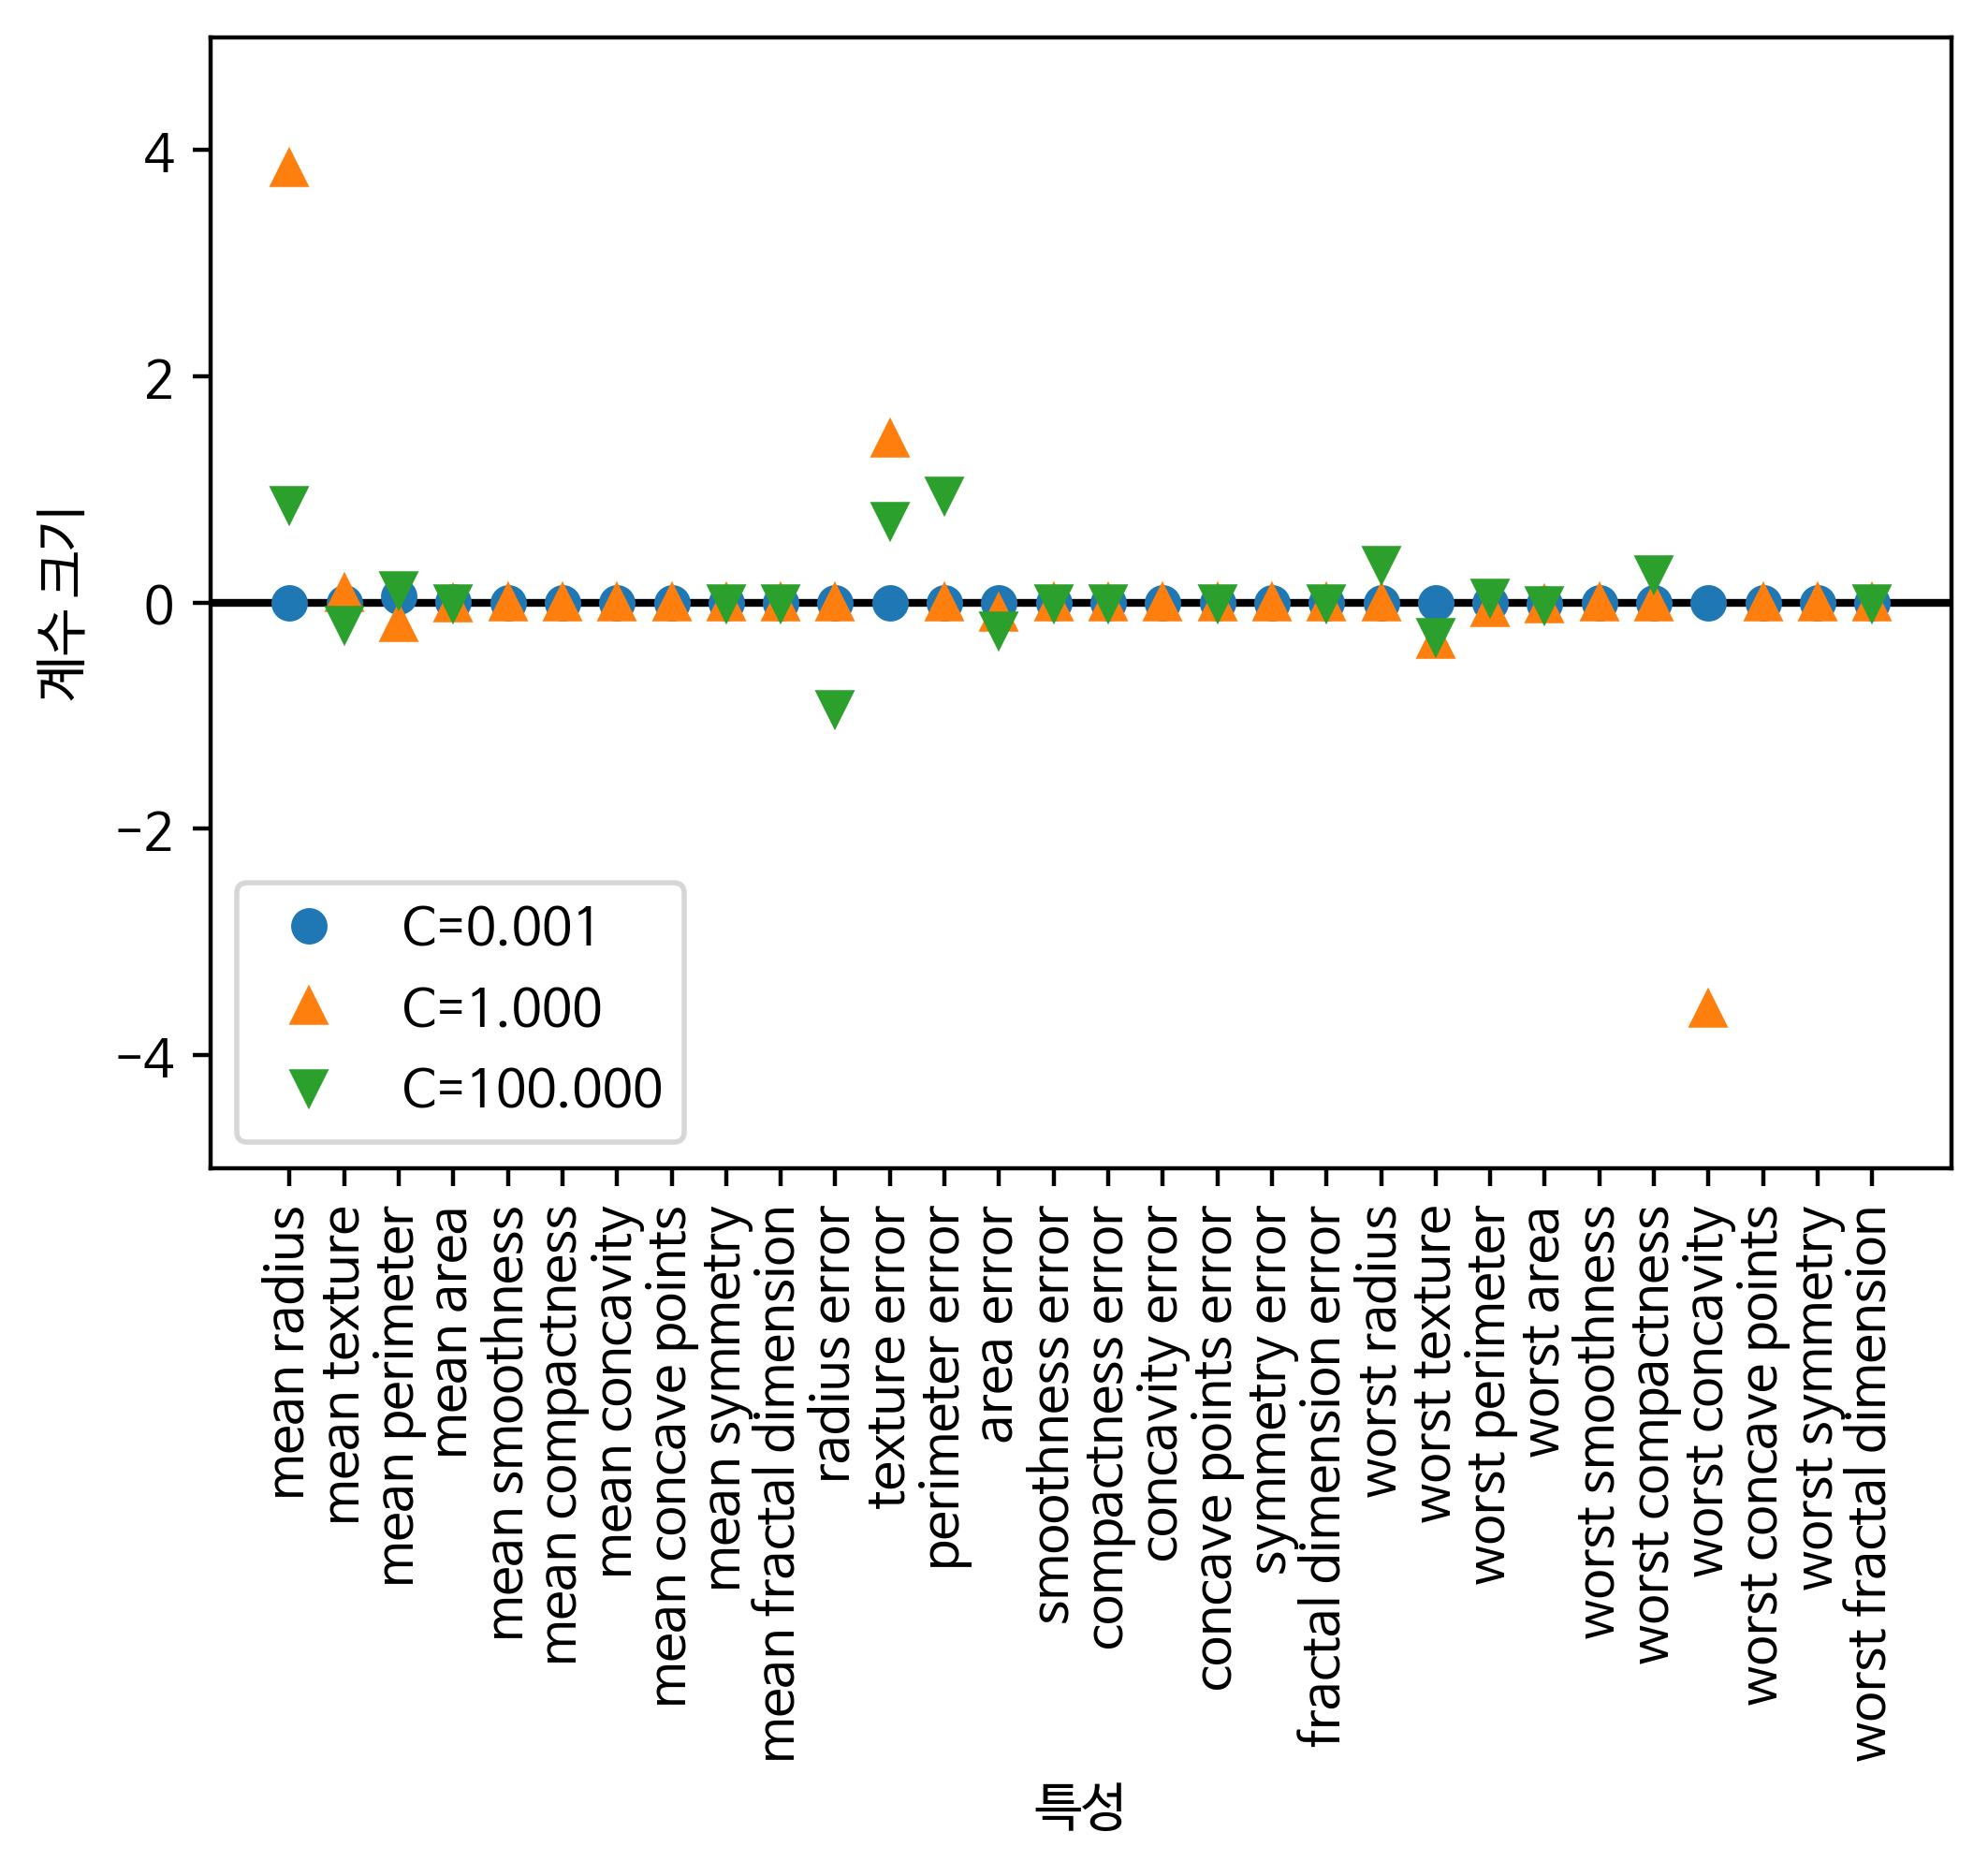

In [ ]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()
